## Analysis of Damage Details

### importing necessary function and libraries 

In [1]:
from dataset_loader_function import load_cleaned_dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = load_cleaned_dataset()
df.columns.sort_values()

e:\githubProjects\Ahmed_Manzim_Ridwan_APF_Project_WiSe_2024_25\scripts\dataset_loader_function.py:10: DtypeWarning: Columns (12,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../dataset/dataset_cleaned.csv')


Index(['apn', 'assessed_value', 'battalion', 'cal_fire_unit', 'city',
       'community', 'county', 'damage', 'damaged_outbuildings',
       'deck_porch_elevated', 'deck_porch_grade', 'defense_actions',
       'distance_propane_tank', 'distance_residence_utility', 'eaves',
       'exterior_siding', 'fence_attached', 'fire_cause',
       'fire_name_secondary', 'fire_start_location', 'global_id',
       'hazard_type', 'incident_name', 'incident_number',
       'incident_start_date', 'latitude', 'longitude',
       'non_damaged_outbuildings', 'object_id', 'patio_cover_carport',
       'roof_construction', 'site_address', 'state', 'street_name',
       'street_number', 'street_suffix', 'street_type', 'structure_category',
       'structure_type', 'units_in_structure', 'vent_screen', 'window_pane',
       'x_coordinate', 'y_coordinate', 'year_built', 'zip_code'],
      dtype='object')

### check unique values of damage type and ensure NaN count

In [ ]:
df_structure_type = np.sort(df["structure_type"].unique())

df_damage_type = df["damage"].unique()

df[["structure_type", "damage"]].dropna().shape

(130723, 2)

### fix typo and inconsistency in naming

In [4]:
# fix family spelling error
df["structure_type"] = df["structure_type"].replace({
    "Single Famliy Residence Single Story": "Single Family Residence Single Story",
    "Utility Misc Structure": "Utility or Miscellaneous Structure > 120 sqft"
})

df["structure_type"].unique().sort() 
df["structure_type"].value_counts()

structure_type
Single Family Residence Single Story             46794
Utility or Miscellaneous Structure > 120 sqft    35279
Single Family Residence Multi Story              28169
Mobile Home Double Wide                           6080
Commercial Building Single Story                  3831
Mobile Home Single Wide                           3218
Motor Home                                        1814
Multi Family Residence Multi Story                1377
Infrastructure                                     920
Multi Family Residence Single Story                882
Commercial Building Multi Story                    671
School                                             613
Mobile Home Triple Wide                            518
Mixed Commercial/Residential                       395
Church                                             130
Hospital                                            25
Agriculture                                          7
Name: count, dtype: int64

### major damage count

In [5]:
# damage category
damage_counts = df["damage"].value_counts()
print(damage_counts)

damage
Destroyed (>50%)    70129
No Damage           53007
Affected (1-9%)      5064
Minor (10-25%)       1338
Major (26-50%)        709
Inaccessible          476
Name: count, dtype: int64


### structure type vs. damage severity

In [24]:
damage_by_structure = df.pivot_table(index="structure_type", columns="damage", aggfunc="size", fill_value=0)

damage_by_structure

damage,affected (1-9%),destroyed (>50%),inaccessible,major (26-50%),minor (10-25%),no damage
structure_type,,,,,,
Agriculture,0,3,0,0,0,4
Church,6,48,0,2,0,74
Commercial Building Multi Story,57,183,0,8,12,411
Commercial Building Single Story,182,1669,6,29,69,1876
Hospital,3,1,0,0,1,20
Infrastructure,66,120,17,36,25,656
Mixed Commercial/Residential,6,109,0,1,5,274
Mobile Home Double Wide,132,4710,8,13,47,1170
Mobile Home Single Wide,43,2426,9,8,12,720


## Visualization

C:\Users\manzi\AppData\Local\Temp\ipykernel_16360\369113247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=damage_counts.index, y=damage_counts.values, palette="Set1")


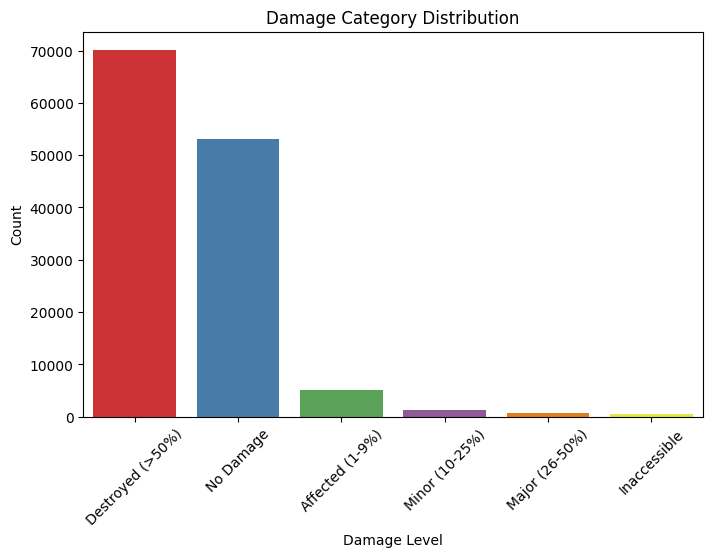

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x=damage_counts.index, y=damage_counts.values, palette="Set1")
plt.title("Damage Category Distribution")
plt.xlabel("Damage Level")
plt.ylabel("Count")
# plt.legend(damage_counts.index, loc="best")
plt.xticks(rotation=45)
plt.show()


### geographic analysis based on latitude & longitude

#### fire-prone zones

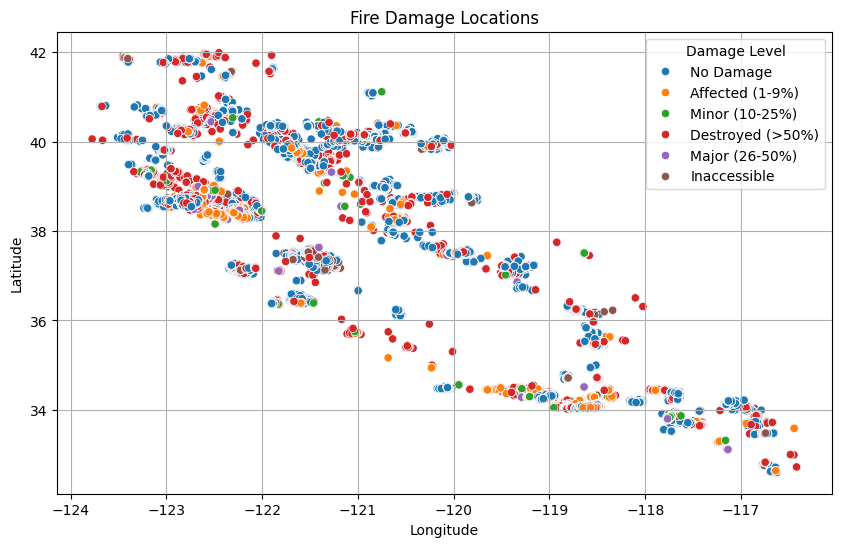

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["damage"], palette="tab10")
plt.title("Fire Damage Locations")
plt.grid(True)
plt.legend(title="Damage Level", loc="best")    
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### interactive plot of the previous graph

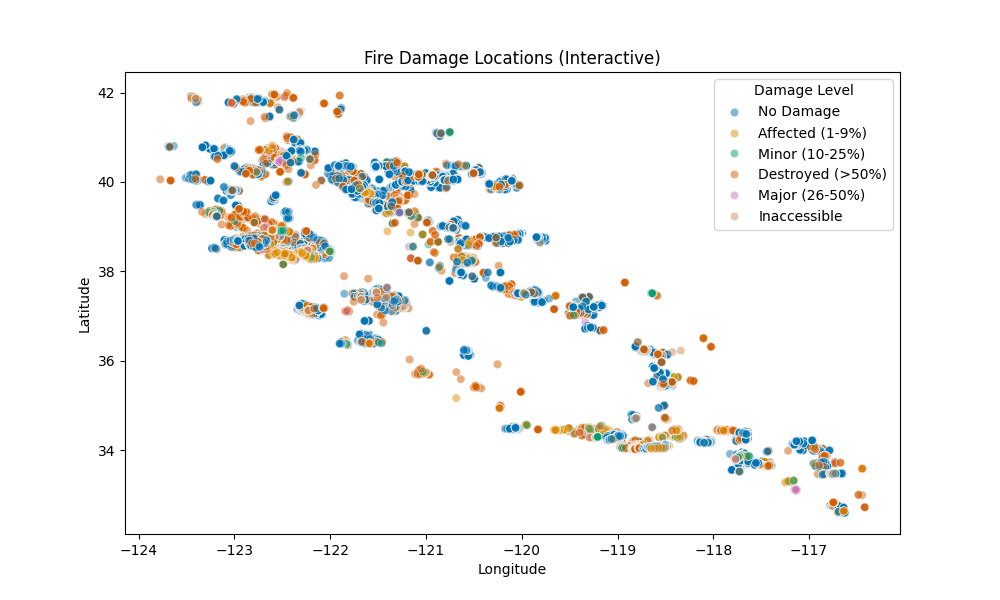

In [ ]:
%matplotlib widget

fig, ax = plt.subplots(figsize=(10, 6))

# scatter plot
sns.scatterplot(
    x=df["longitude"], 
    y=df["latitude"], 
    hue=df["damage"], 
    palette="colorblind", 
    alpha=0.5, 
    ax=ax
)

# labels and title
ax.set_title("Fire Damage Locations (Interactive)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(title="Damage Level", loc="best")
plt.show()


### financial analysis

In [10]:
df.columns.sort_values()

Index(['apn', 'assessed_value', 'battalion', 'cal_fire_unit', 'city',
       'community', 'county', 'damage', 'damaged_outbuildings',
       'deck_porch_elevated', 'deck_porch_grade', 'defense_actions',
       'distance_propane_tank', 'distance_residence_utility', 'eaves',
       'exterior_siding', 'fence_attached', 'fire_cause',
       'fire_name_secondary', 'fire_start_location', 'global_id',
       'hazard_type', 'incident_name', 'incident_number',
       'incident_start_date', 'latitude', 'longitude',
       'non_damaged_outbuildings', 'object_id', 'patio_cover_carport',
       'roof_construction', 'site_address', 'state', 'street_name',
       'street_number', 'street_suffix', 'street_type', 'structure_category',
       'structure_type', 'units_in_structure', 'vent_screen', 'window_pane',
       'x_coordinate', 'y_coordinate', 'year_built', 'zip_code'],
      dtype='object')

In [ ]:
# convert 'assessed_value' to numeric 
df["assessed_value"] = pd.to_numeric(df["assessed_value"], errors="coerce")

# Standardize  
df["damage"] = df["damage"].str.lower().str.strip()

# define categories 
destroyed_categories = ["destroyed (>50%)", "major (26-50%)"]

# calculate total estimated loss
total_loss = df[df["damage"].isin(destroyed_categories)]["assessed_value"].sum()

print(f"Estimated total property loss: ${total_loss:,.2f}")

Estimated total property loss: $42,490,827,231.00


In [25]:
# Format the cost breakdown
damage_cost_breakdown = df.groupby("damage")["assessed_value"].sum().sort_values(ascending=False)
damage_cost_breakdown = damage_cost_breakdown.apply(lambda x: f"${x:,.2f}")

print(damage_cost_breakdown)

damage
destroyed (>50%)    $42,017,161,758.00
no damage           $35,346,135,390.00
affected (1-9%)     $11,022,583,900.00
minor (10-25%)       $2,660,190,577.00
major (26-50%)         $473,665,473.00
inaccessible           $120,216,295.00
Name: assessed_value, dtype: object


### graphical representation of each type of damage and the damaged value

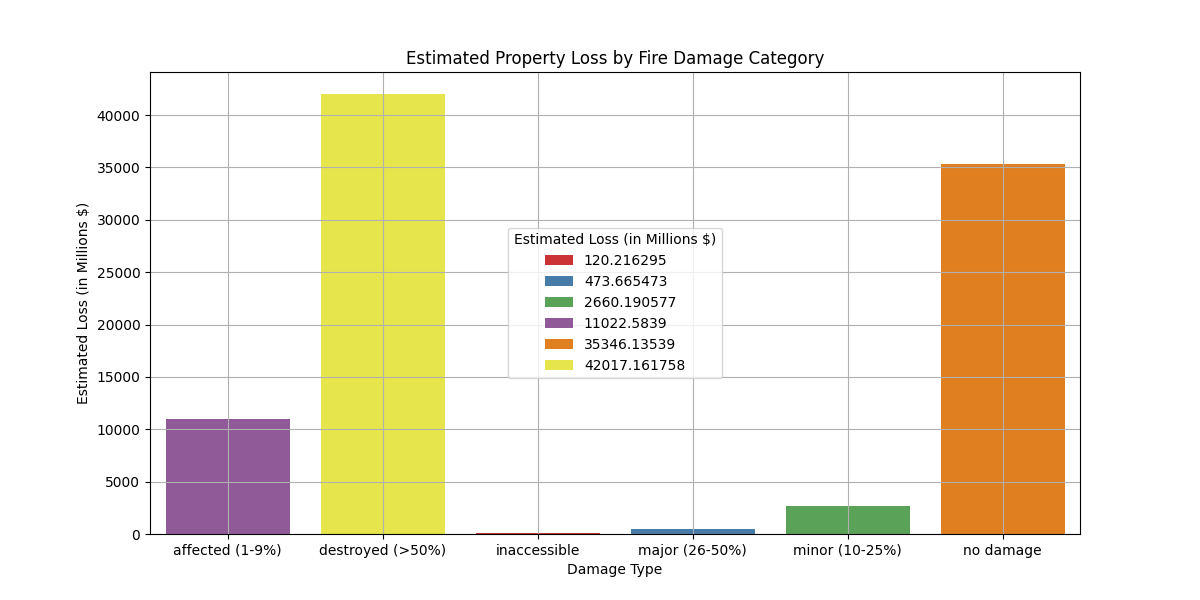

In [ ]:
# croup and sort damage cost
damage_cost_breakdown_vs_damaged_value = df.groupby("damage")["assessed_value"].sum()

# convert values to millions for better readability
damage_cost_breakdown_vs_damaged_value = damage_cost_breakdown_vs_damaged_value / 1e6  

# create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=damage_cost_breakdown_vs_damaged_value.values, 
    x=damage_cost_breakdown_vs_damaged_value.index, 
    palette="Set1",
    hue=damage_cost_breakdown_vs_damaged_value.values
)

# titles and labels
plt.ylabel("Estimated Loss (in Millions $)")
plt.xlabel("Damage Type")
plt.grid(True)
plt.title("Estimated Property Loss by Fire Damage Category")
plt.legend(title="Estimated Loss (in Millions $)", loc="center")

plt.show()


### type of structure vs type of damage comparison

In [ ]:
# cross-tabulation of structure type vs. damage type
damage_vs_structure = pd.crosstab(df["structure_type"], df["damage"])

damage_vs_structure

damage,affected (1-9%),destroyed (>50%),inaccessible,major (26-50%),minor (10-25%),no damage
structure_type,,,,,,
Agriculture,0,3,0,0,0,4
Church,6,48,0,2,0,74
Commercial Building Multi Story,57,183,0,8,12,411
Commercial Building Single Story,182,1669,6,29,69,1876
Hospital,3,1,0,0,1,20
Infrastructure,66,120,17,36,25,656
Mixed Commercial/Residential,6,109,0,1,5,274
Mobile Home Double Wide,132,4710,8,13,47,1170
Mobile Home Single Wide,43,2426,9,8,12,720


### convert to %

In [26]:
# structure type
damage_vs_structure_percent = damage_vs_structure.div(damage_vs_structure.sum(axis=1), axis=0) * 100

# 2 decimal places
damage_vs_structure_percent.round(2)

damage,affected (1-9%),destroyed (>50%),inaccessible,major (26-50%),minor (10-25%),no damage
structure_type,,,,,,
Agriculture,0.00,42.86,0.00,0.00,0.00,57.14
Church,4.62,36.92,0.00,1.54,0.00,56.92
Commercial Building Multi Story,8.49,27.27,0.00,1.19,1.79,61.25
Commercial Building Single Story,4.75,43.57,0.16,0.76,1.80,48.97
Hospital,12.00,4.00,0.00,0.00,4.00,80.00
Infrastructure,7.17,13.04,1.85,3.91,2.72,71.30
Mixed Commercial/Residential,1.52,27.59,0.00,0.25,1.27,69.37
Mobile Home Double Wide,2.17,77.47,0.13,0.21,0.77,19.24
Mobile Home Single Wide,1.34,75.39,0.28,0.25,0.37,22.37


### bar chart

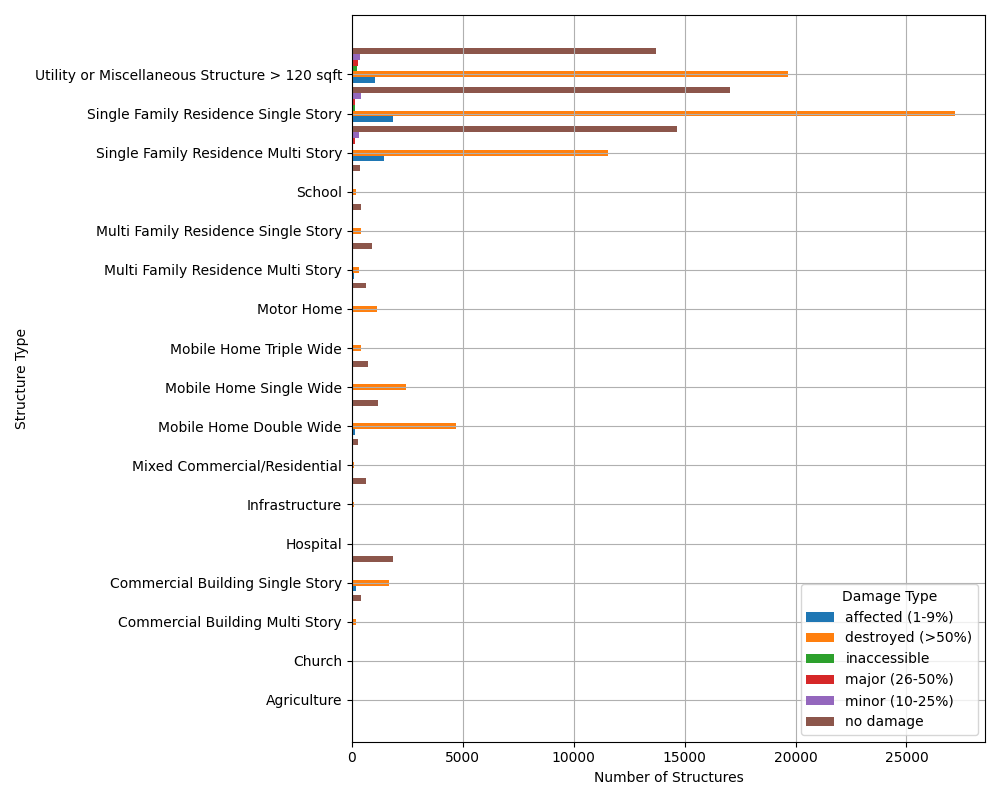

In [27]:
plt.figure(figsize=(10, 8))

y = np.arange(len(damage_vs_structure.index)) 
width = 0.15  # bar width

# Plot each damage category as a separate horizontal bar
for i, damage_type in enumerate(damage_vs_structure.columns):
    plt.barh(y + i * width, damage_vs_structure[damage_type], height=width, label=damage_type)

plt.ylabel("Structure Type")  
plt.xlabel("Number of Structures")  
plt.legend(title="Damage Type", loc="best")
plt.yticks(y + width, damage_vs_structure.index)  
plt.legend(title="Damage Type", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

### top5 structural damage

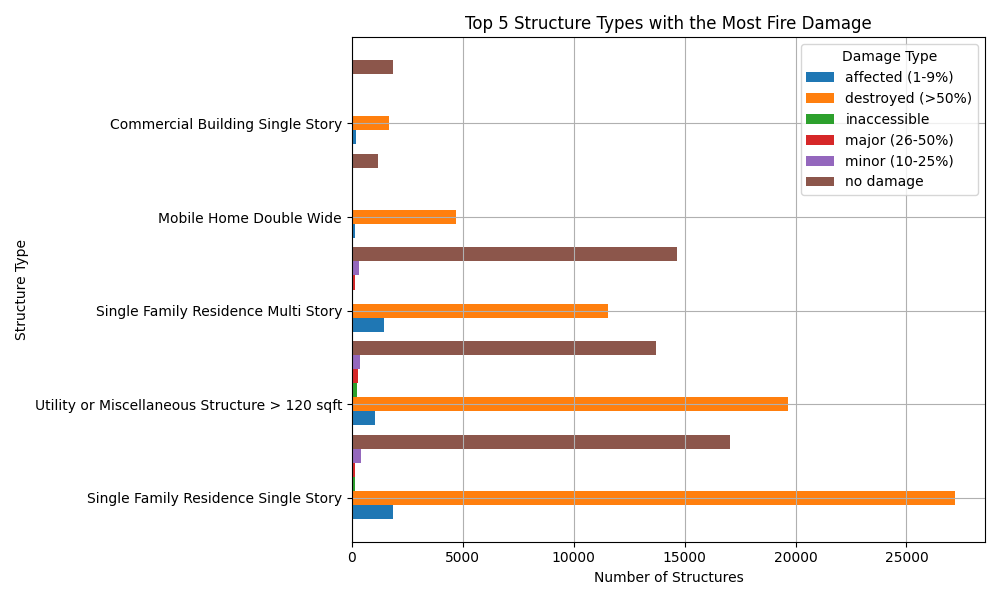

In [ ]:
# sum across damage categories for total impact per structure type
total_damage_per_structure = damage_vs_structure.sum(axis=1)

# select the top 5 structure types vs total damage
top_5_structures = total_damage_per_structure.sort_values(ascending=False).head(5)
filtered_damage_vs_structure = damage_vs_structure.loc[top_5_structures.index]

plt.figure(figsize=(10, 6))

y = np.arange(len(filtered_damage_vs_structure.index))  
width = 0.15 

for i, damage_type in enumerate(filtered_damage_vs_structure.columns):
    plt.barh(
        y + i * width,
        filtered_damage_vs_structure[damage_type],
        height=width,
        label=damage_type
    )

plt.ylabel("Structure Type")  
plt.xlabel("Number of Structures") 
plt.title("Top 5 Structure Types with the Most Fire Damage")
plt.yticks(y + width, filtered_damage_vs_structure.index) 
plt.legend(title="Damage Type", loc="best")
plt.grid(True)  

plt.tight_layout()
plt.show()


C:\Users\manzi\AppData\Local\Temp\ipykernel_16360\425269458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=structure_cost_breakdown.values, x=structure_cost_breakdown.index, palette="Reds")


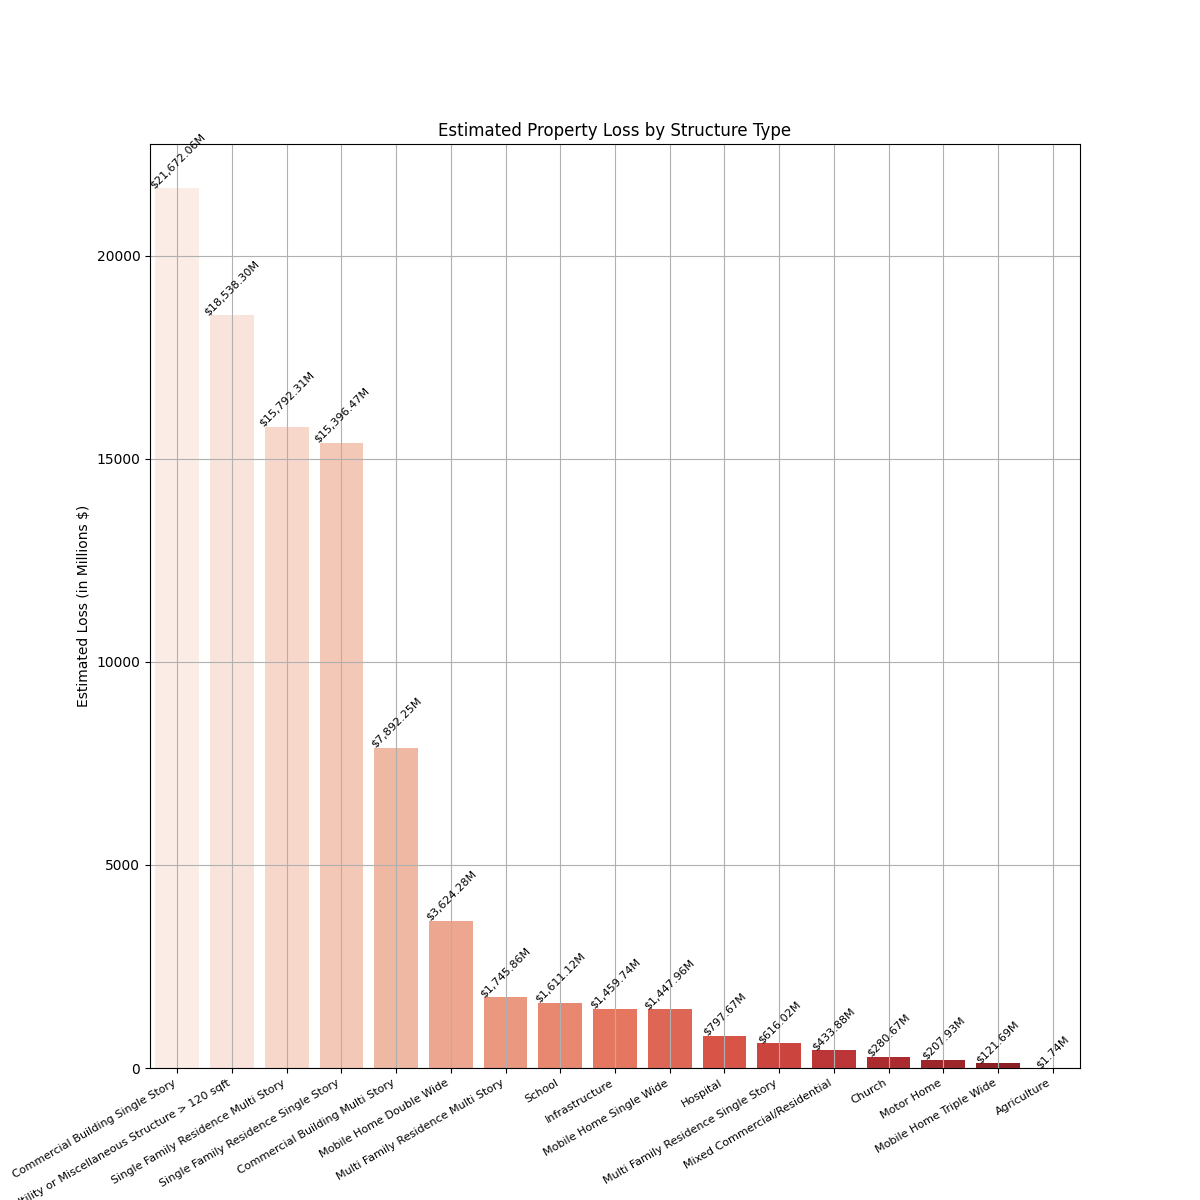

In [28]:
# group by structure type and sum assessed_value (converted to Millions)
structure_cost_breakdown = df.groupby("structure_type")["assessed_value"].sum().sort_values(ascending=False) / 1e6  

plt.figure(figsize=(12, 12))
sns.barplot(y=structure_cost_breakdown.values, x=structure_cost_breakdown.index, palette="Reds")

plt.ylabel("Estimated Loss (in Millions $)")
plt.xlabel("Structure Type")
plt.title("Estimated Property Loss by Structure Type")
plt.xticks(rotation=30, ha="right", fontsize=8)
plt.grid(True)

for index, value in enumerate(structure_cost_breakdown):
    plt.text(index, value, f"${value:,.2f}M", ha="center", size=8, rotation=45)

plt.show()


C:\Users\manzi\AppData\Local\Temp\ipykernel_16360\2536189350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=structure_cost_breakdown.values, x=structure_cost_breakdown.index, palette="Reds")


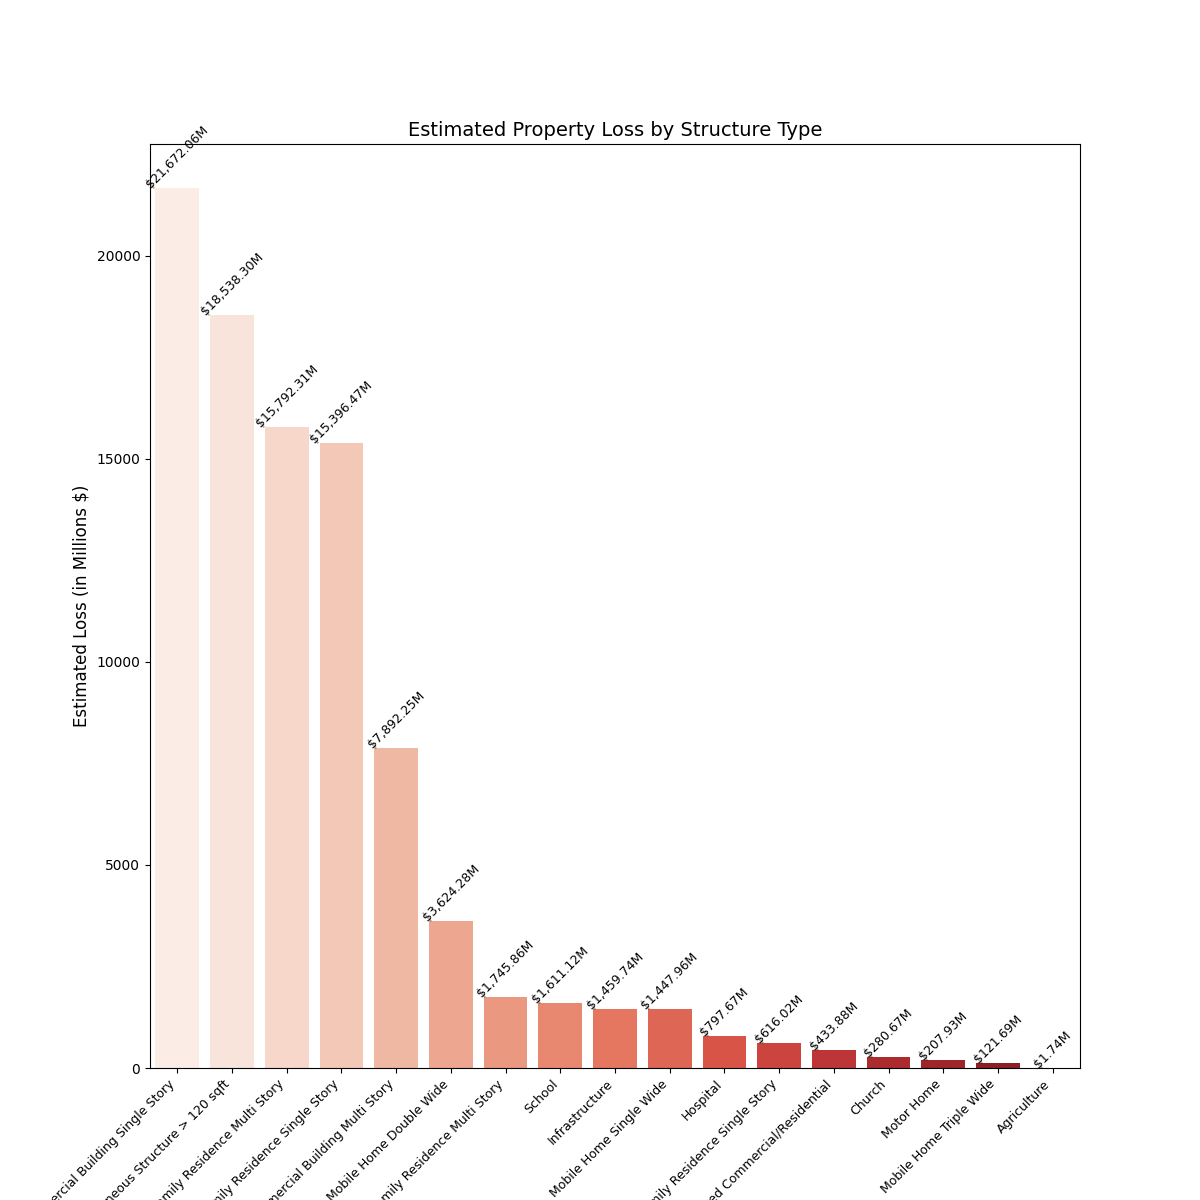

In [29]:
plt.figure(figsize=(12, 12))
sns.barplot(y=structure_cost_breakdown.values, x=structure_cost_breakdown.index, palette="Reds")

plt.ylabel("Estimated Loss (in Millions $)", fontsize=12)
plt.xlabel("Structure Type", fontsize=12)
plt.title("Estimated Property Loss by Structure Type", fontsize=14)

plt.xticks(rotation=45, ha="right", fontsize=9) 

# values displayed on bar
for index, value in enumerate(structure_cost_breakdown):
    plt.text(index, value + 5, f"${value:,.2f}M", ha="center", fontsize=9, rotation=45)  
plt.show()
